In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

import time

In [2]:
from sklearn.datasets import fetch_mldata

from sklearn.model_selection import train_test_split

In [3]:
mnist = fetch_mldata('MNIST original')
mnist

C:\Users\howki\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\howki\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


TimeoutError: [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다

In [ ]:
mnist = fetch_mldata('MNIST original')

(train_data, test_data, train_labels, test_labels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=1234)

print(len(train_data))
print(len(test_data))

#############
# 52500
# 17500


# 0~9까지 데이터가 다 들어 있는지 확인!
### 실제로 우리가 학습 시킬 데이터가 0~9 까지 다 제대로 들어있는 데이터인지 확인

In [17]:
print(np.unique(train_labels))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [18]:
# method 01) numpy의 nuique 이용해서 처리
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[0.000e+00 5.166e+03]
 [1.000e+00 5.894e+03]
 [2.000e+00 5.282e+03]
 [3.000e+00 5.280e+03]
 [4.000e+00 5.131e+03]
 [5.000e+00 4.743e+03]
 [6.000e+00 5.171e+03]
 [7.000e+00 5.502e+03]
 [8.000e+00 5.154e+03]
 [9.000e+00 5.177e+03]]


# 실제 데이터 값을 이미지로 확인해보자!

In [19]:
import seaborn as sns

In [20]:
# 이미 앞에서 label은 분리하였으니, 순수 데이터에서 크기 부분을 확인하자!!!
print(train_data[0].shape)
print(np.sqrt(train_data[0].shape[0]))

(784,)
28.0


In [21]:
print(test_data[0].shape)
print(np.sqrt(test_data[0].shape[0]))

(784,)
28.0


Text(0.5, 1, 'MNIST Digit Image _ Train Data Number :0')

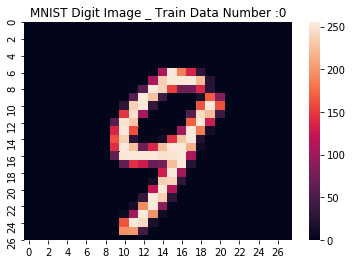

In [35]:
# 보고자 하는 데이터의 index
idx = 0
image_data = train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
plt.title(str("MNIST Digit Image _ Train Data Number :")+str(idx))

# Normalization - Max/Min  method

#### new x = (x - x_min) / (x_max - x_min)
            
            from sklearn.preprocessing import MinMaxscaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
min_max_scaler = MinMaxScaler()
train_norm = min_max_scaler.fit_transform(train_data)
test_norm = min_max_scaler.fit_transform(test_data)

# 기본 분석 시작

 - 참고로 데이터의 수가 많기 때문에 한 번 수행하는데 시간이 상당히 소요되니, 시간에 대한 부분을 잘 생각할 것
 - 참고 ) n_jobs : int, oprtional (dafault = 1)

In [38]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [40]:
t1 = time.time()
# instantiate learning model( k = 3 )
# n_jobs = -1 하지 않으면 시간이 많이 걸리게 된다!! 
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

# fitting the model
knn.fit(train_data, train_labels)

# predict the response
pred = knn.predict(test_data)

t2 = time.time()
print("Process Time : " + str(t2-t1))

# evaluate accuracy
print(accuracy_score(test_labels, pred))

Process Time : 160.67454838752747
0.9718857142857142


In [57]:
t1 = time.time()
myList = list(range(1,8))

neighbors = filter(lambda x : x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    scores = cross_val_score(knn, train_data, train_labels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(scores.mean())
    
# changing to misclassification error
MSE = [1- x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" %optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

t2 = time.time()
print("Process Time : "+str(t2-t1))

0.9712186538205725
0.9714660951214116
0.9701332546666194
0.9691615104010239


TypeError: 'filter' object is not subscriptable

### with PCA - 주 성분 분석

In [42]:
from sklearn.decomposition import PCA

In [43]:
num_comp = 40
pca = PCA(n_components=num_comp)

In [44]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
# determine amount of variance explained by componenets
np.sum(pca.explained_variance_ratio_)

0.7869866696754264

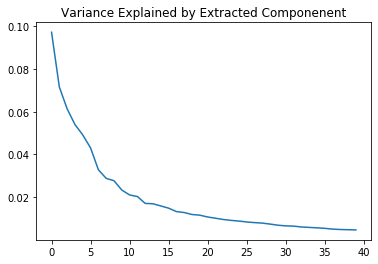

In [46]:
# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Componenent')
plt.show()

In [47]:
# extract the features
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(52500, 40)


In [48]:
# transform the test data using the exisiting parameters
test_ext = pca.transform(test_data)
print(test_ext.shape)

(17500, 40)


In [49]:
min_max_scaler = MinMaxScaler()

In [50]:
train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

In [52]:
knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
# from sklearn.model_selection import cross_validation
# from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [54]:
# 시간 오래 걸림...
cross_val_score(knn, train_norm, train_labels, cv=5)

array([0.9723941 , 0.97124357, 0.97075912, 0.97332825, 0.96894055])

- 위의 기본 세팅에서도 거의 97% 의 결과가 나타났는데, PCA로 성분을 줄이면 오히려 더 좋은 성능이나,
  적은 데이터로 유사한 성능을 확보할 수 있다!!
 

- 이와 같은 방법을 주로 사용하는 이유는 knn은 상당히 심플하면서도 성능이 좋은 알고리즘인데,
  문제를 차원의 저주에 걸리면 상당한 성능저하를 야기하고 있다. 그래서 기본적으로 많은 사람들이 PCA나 DT등
  여러가지 방법을 활용하여서 차원 축소를 하고 적용을 하는 경우가 많음!!